# Linear Regression

In [77]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import sys
import time

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [131]:
x = np.arange(11,dtype=np.float32).reshape(-1,1)
print(x.shape)

(11, 1)


In [132]:
y = np.array([2*i + 10 for i in x],dtype=np.float32).reshape(-1,1)
print(y.shape)

(11, 1)


<Figure size 432x288 with 0 Axes>

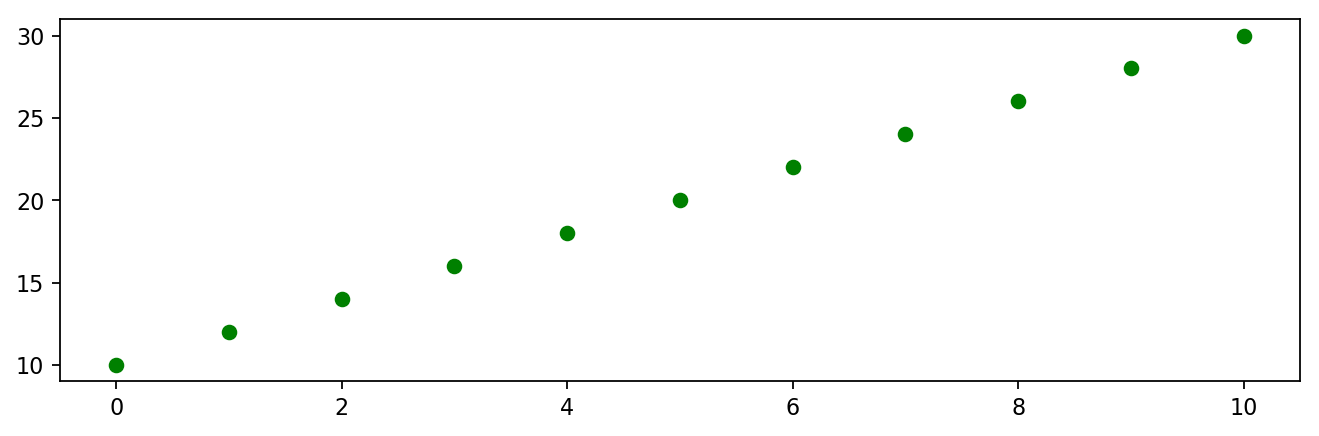

In [138]:
plt.clf()
plt.figure(figsize=(10, 3), dpi=80)
plt.plot(x,y,'go',label='Real f(x)', linewidth=2.5,)
plt.show()

In [146]:
class LinearRegressionModel(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(LinearRegressionModel,self).__init__()
        self.linear = nn.Linear(input_dim,output_dim)
    
    def forward(self,x):
        return self.linear(x)
    
model = LinearRegressionModel(input_dim=1,output_dim=1)

if torch.cuda.is_available():
    print('I\'go with cuda :D')
    model.cuda()

In [147]:
learning_rate = 0.01
mse = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [148]:
epochs = 5000
inputs = torch.from_numpy(x)
labels = torch.from_numpy(y)
initial = time.time()
for epoch in range(1,epochs+1):
    
    #initializing grads for optimzer
    optimizer.zero_grad()
    #Forward pass
    outputs = model(inputs)
    #calculating loss
    loss = mse(outputs,labels)
    #calculating grads
    loss.backward()
    #stepping in order to update parms
    optimizer.step()    
    
    print("\repoch {:4d} \tloss {:7.4f}".format(epoch,loss),end="")
    sys.stdout.flush()
evaluated = time.time()-initial
print('\nEvaluated time {:7.2f} seconds'.format(evaluated))


epoch 5000 	loss  0.00006
Evaluated time    7.03 seconds


## Predicting eg.: Inferencing

In [149]:
predicted = model(torch.from_numpy(x)).data.numpy()
predicted

array([[ 9.997376],
       [11.997766],
       [13.998155],
       [15.998544],
       [17.998932],
       [19.999321],
       [21.99971 ],
       [24.0001  ],
       [26.000488],
       [28.000877],
       [30.001266]], dtype=float32)

In [150]:
y

array([[10.],
       [12.],
       [14.],
       [16.],
       [18.],
       [20.],
       [22.],
       [24.],
       [26.],
       [28.],
       [30.]], dtype=float32)

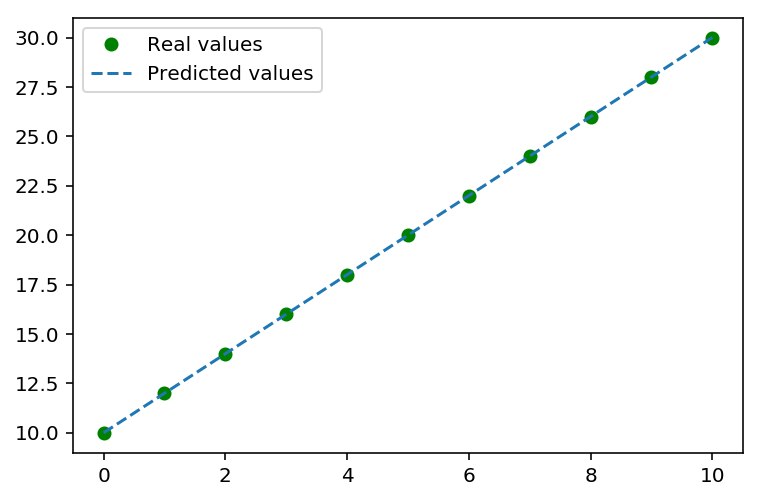

In [151]:
plt.clf()

plt.plot(x,y,'go',label='Real values')
plt.plot(x,predicted,'--',label='Predicted values')
plt.legend(loc='best')
plt.show()